In [34]:
import re
import glob
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%inline matplotlib

UsageError: Line magic function `%inline` not found.


In [35]:
items = glob.glob("./data/train/*.csv")
df_train = pd.DataFrame([])
for item in items:
  df_train = pd.concat([df_train,pd.read_csv(item)])

df_test = pd.read_csv('./data/test.csv')

df_train["chk"] = 0
df_test["chk"] = 1
df_all = pd.concat([df_train,df_test])

C:\Users\yuji_\AppData\Local\Temp\ipykernel_10036\3320821385.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.concat([df_train,pd.read_csv(item)])
C:\Users\yuji_\AppData\Local\Temp\ipykernel_10036\3320821385.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.concat([df_train,pd.read_csv(item)])


In [36]:
drop_cols = []
for col in df_train.columns:
  if df_train[col].count() == 0:
    drop_cols.append(col)
df_all = df_all.drop(drop_cols,axis=1)
df_all = df_all.drop(["市区町村名","種類"],axis=1)

In [37]:
df_all["面積（㎡）"] = df_all["面積（㎡）"].replace("2000㎡以上",2000)
df_all["面積（㎡）"] = df_all["面積（㎡）"].astype(float)
df_all["最寄駅：距離（分）"] = df_all["最寄駅：距離（分）"].replace({"0分?60分":45,"30分?60分":45,"1H?1H30":75,"2H?":120,"1H30?2H":105}) 
df_all["最寄駅：距離（分）"] = df_all["最寄駅：距離（分）"].astype(float)

In [38]:
year_dic = {}
for i in df_all["建築年"].value_counts().keys():
  if "昭和" in i:
    num = int(re.sub(r"\D","",i)) + 1925
    year = 2023 - num

  if "平成" in i:
    num = int(re.sub(r"\D","",i)) + 1988
    year = 2023 - num
  
  if "令和" in i:
    num = int(re.sub(r"\D","",i)) + 2018
    year = 2023 - num

  year_dic[i] = year

df_all['建築年'] = df_all['建築年'].replace(year_dic)

In [39]:
quarter_dic = {
  "年第１四半期":".25",
  "年第２四半期":".50",
  "年第３四半期":".75",
  "年第４四半期":".99",
  }
year_list = {}

for i in df_all["取引時点"].value_counts().keys():
  for k,j in quarter_dic.items():
    if k in i:
      year_rep = i.replace(k,j)
      year_list[i] = year_rep

df_all["取引時点"] = df_all["取引時点"].replace(year_list).astype(float)

In [ ]:
df_all.to_csv("./data/processed/df_all.csv",index=False)

In [40]:
df_all.describe()

,ID,市区町村コード,最寄駅：距離（分）,面積（㎡）,建築年,建ぺい率（％）,容積率（％）,取引時点,取引価格（総額）_log,chk
count,6.568170e+05,656817.000000,633759.000000,656817.000000,637921.000000,633893.000000,633893.000000,656817.000000,637351.000000,656817.000000
mean,1.847857e+07,18514.986046,11.705222,58.607390,27.884805,67.623447,301.903981,2013.831473,7.217424,0.029637
std,9.566279e+06,9592.863791,12.175961,26.717929,11.479656,10.404475,148.211553,3.991321,0.353935,0.169584
min,1.000000e+06,1101.000000,0.000000,10.000000,3.000000,30.000000,50.000000,2005.750000,2.653213,0.000000
25%,1.306371e+07,13107.000000,5.000000,45.000000,19.000000,60.000000,200.000000,2010.500000,7.000000,0.000000
50%,1.402798e+07,14104.000000,8.000000,65.000000,27.000000,60.000000,200.000000,2013.990000,7.255273,0.000000
75%,2.703184e+07,27114.000000,14.000000,75.000000,36.000000,80.000000,400.000000,2017.250000,7.447158,0.000000
max,4.703203e+07,47213.000000,120.000000,2000.000000,77.000000,80.000000,1300.000000,2020.500000,9.934498,1.000000


In [41]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656817 entries, 0 to 19465
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            656817 non-null  int64  
 1   市区町村コード       656817 non-null  int64  
 2   都道府県名         656817 non-null  object 
 3   地区名           656523 non-null  object 
 4   最寄駅：名称        654185 non-null  object 
 5   最寄駅：距離（分）     633759 non-null  float64
 6   間取り           634153 non-null  object 
 7   面積（㎡）         656817 non-null  float64
 8   建築年           637921 non-null  float64
 9   建物の構造         641624 non-null  object 
 10  用途            604694 non-null  object 
 11  今後の利用目的       293530 non-null  object 
 12  都市計画          637908 non-null  object 
 13  建ぺい率（％）       633893 non-null  float64
 14  容積率（％）        633893 non-null  float64
 15  取引時点          656817 non-null  float64
 16  改装            597467 non-null  object 
 17  取引の事情等        18427 non-null   object 
 18  取引価格（総額）_l

In [42]:
df_all.columns

Index(['ID', '市区町村コード', '都道府県名', '地区名', '最寄駅：名称', '最寄駅：距離（分）', '間取り', '面積（㎡）',
       '建築年', '建物の構造', '用途', '今後の利用目的', '都市計画', '建ぺい率（％）', '容積率（％）', '取引時点',
       '改装', '取引の事情等', '取引価格（総額）_log', 'chk'],
      dtype='object')

In [43]:
show_list = []
for col in df_all.columns:
  if df_all[col].dtype != object:
    show_list.append(col)

show_list

['ID',
 '市区町村コード',
 '最寄駅：距離（分）',
 '面積（㎡）',
 '建築年',
 '建ぺい率（％）',
 '容積率（％）',
 '取引時点',
 '取引価格（総額）_log',
 'chk']

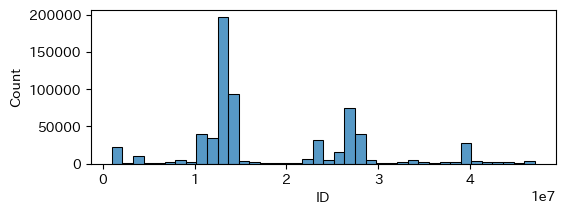

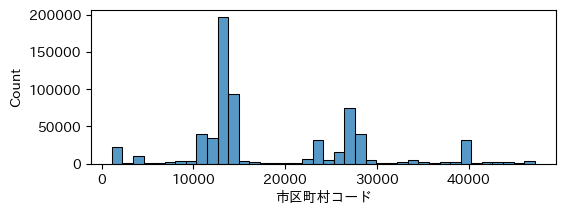

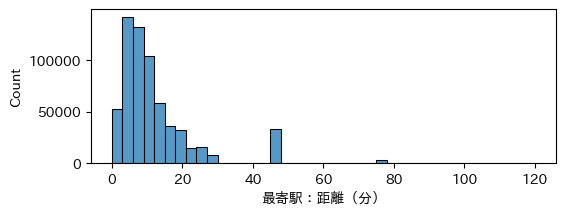

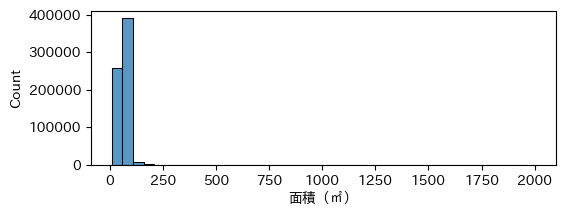

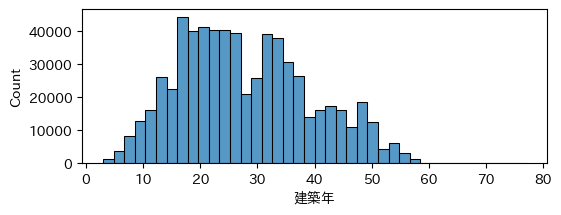

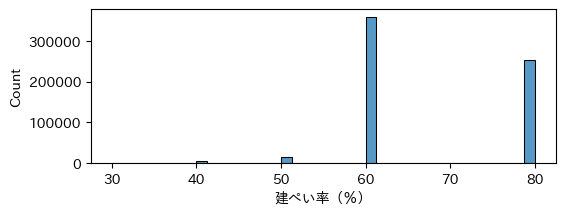

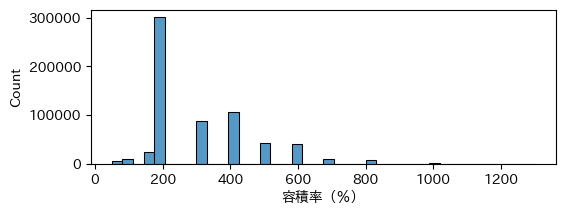

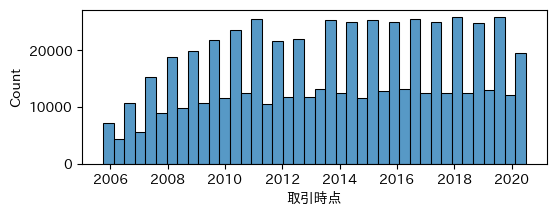

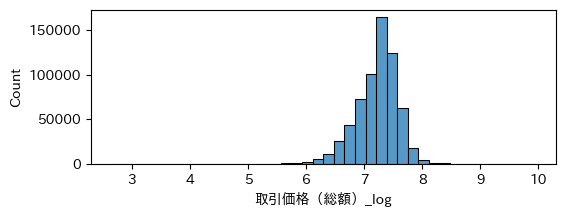

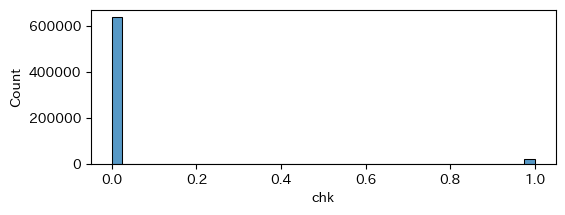

In [44]:
for i,item in enumerate(show_list):
  plt.figure(figsize=(6,2))
  sns.histplot(df_all[item],bins=40)
  plt.show()

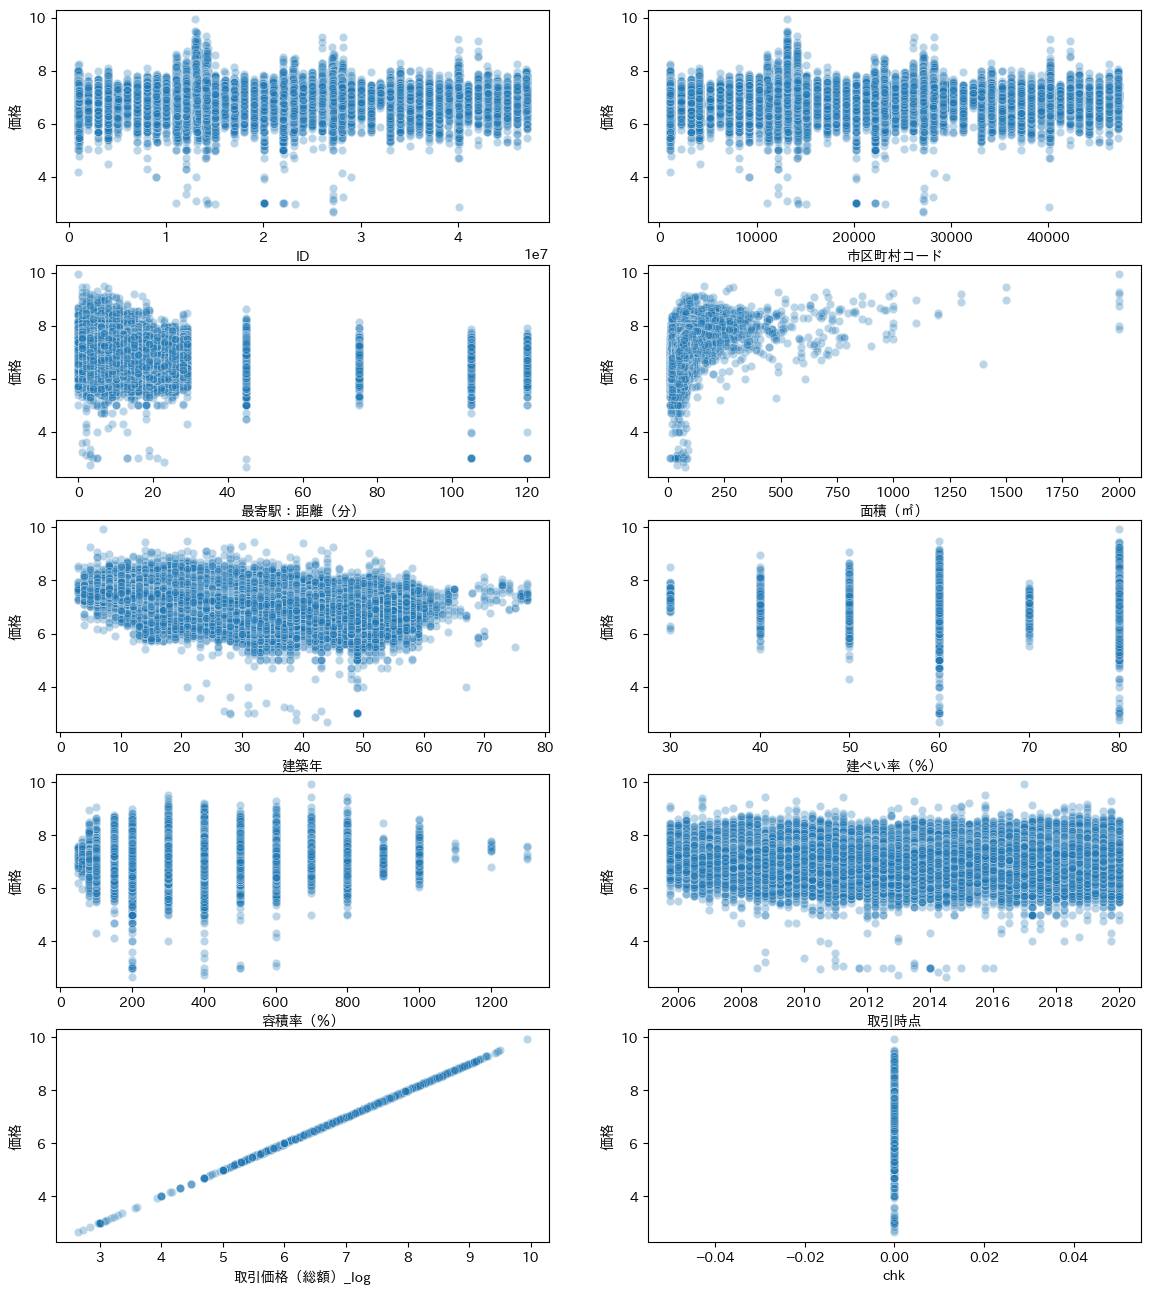

In [45]:
fig = plt.figure(figsize=(14,16))

for i,col in enumerate(show_list):
  sns.scatterplot(
    data=df_all,
    x=col,
    y="取引価格（総額）_log",
    alpha=0.3,
    ax=fig.add_subplot(math.ceil(len(show_list)/2),2,i+1,ylabel='価格')
    )

plt.show()

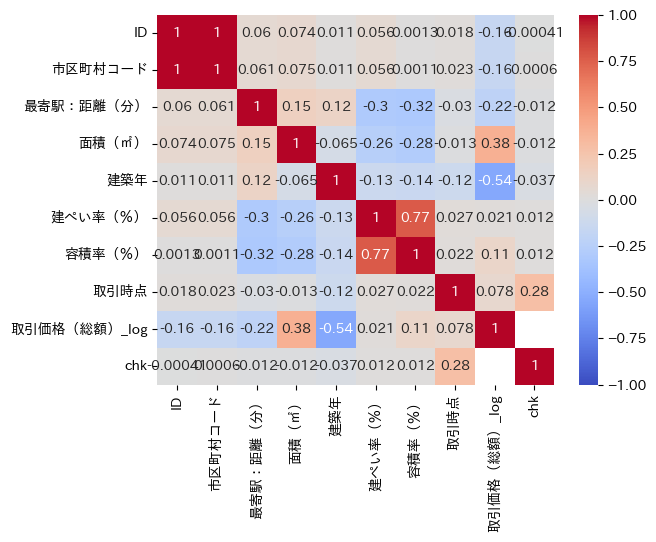

In [52]:
sns.heatmap(df_all[show_list].corr(),vmin=-1,annot=True,cmap="coolwarm")
plt.show()

In [59]:
df_all["取引年"] = df_all["取引時点"].apply(lambda x: str(x)[:4])

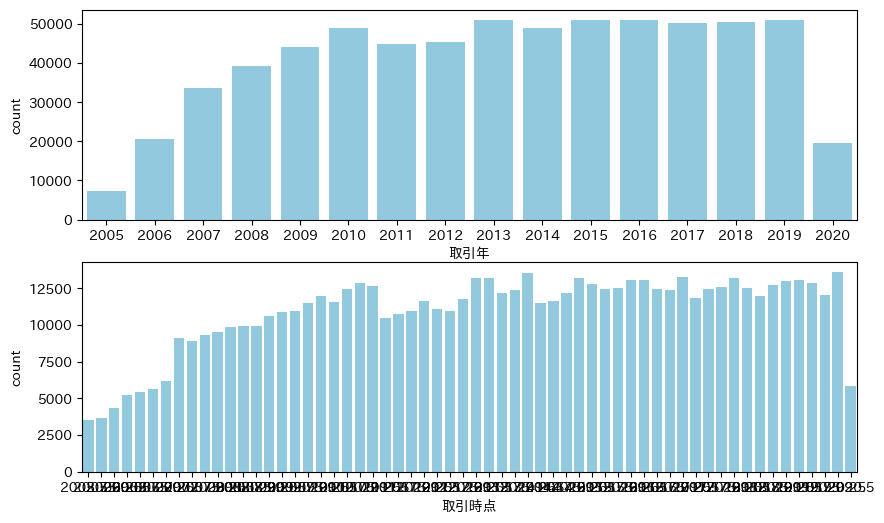

In [73]:
fig,axes = plt.subplots(2,1,figsize=(10,6))
sns.countplot(data=df_all.sort_values(by="取引年"),x="取引年",ax=axes[0],color="skyblue")
sns.countplot(data=df_all.sort_values(by="取引時点"),x="取引時点",ax=axes[1],color="skyblue")
plt.show()

In [75]:
train_df = df_all[df_all['chk'] == 0]
test_df = df_all[df_all['chk'] == 1]
train_df.drop("chk",axis=1).to_csv('./data/processed/train.csv',index=False)
test_df.drop("chk",axis=1).to_csv('./data/processed/test.csv',index=False)